# Prática 1

***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**



Considere os dados de COVID-19 para a cidade de São Paulo. Nesta prática, aplicaremos os conhecimentos adquiridos na Aula 1, fazendo:

1. Visualização de dados completos e parciais

2. Construiremos gráficos da média móvel simples e exponencialmente ponderada, para casos e para mortes separadamente.

3. Faremos a decomposição em tendência e sazonalidade

## Exercício 1: 

1. Leia os dados de COVID-19 da base covid_caso.csv. 

2. Considere os dados de casos e mortes diárias (diferenças). Salve os dados da cidade de São Paulo num arquivo covidSaoPaulo.csv.

3. Produza um gráfico da séries de casos e mortes diários da cidade de São Paulo desde o primeiro caso.

4. Em seguida, considere o gráfico do log de casos a partir somente do centésimo caso.




In [70]:
# Carregue as bibliotecas necessárias

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**1. Faça a leitura dos dados a partir do arquivo covid_caso.csv disponível no material do curso.**

In [71]:
dados = pd.read_csv("Dados/covid_caso.csv", parse_dates=True, index_col="date")
dados.head()

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,
2020-07-11,AP,NaN,state,31279,473,113,True,845731.0,16.0,3698.45731,0.0151
2020-07-10,AP,NaN,state,31080,470,112,False,845731.0,16.0,3674.92737,0.0151
2020-07-09,AP,NaN,state,30763,467,111,False,845731.0,16.0,3637.44500,0.0152
2020-07-08,AP,NaN,state,30524,462,110,False,845731.0,16.0,3609.18543,0.0151
2020-07-07,AP,NaN,state,30294,455,109,False,845731.0,16.0,3581.99002,0.0150


In [72]:

# Escreva seus comandos na célula de cima para não perder o resultado abaixo


**Considere apenas os dados de casos e óbitos diários da cidade de São Paulo. Tome as diferenças para obter dados diários.**


In [73]:
diario = dados.query("city == 'São Paulo'")[["confirmed", "deaths"]].copy()

In [74]:
diario.sort_index(inplace = True)

In [75]:
diario

,confirmed,deaths
date,,
2020-02-25,1,0
2020-02-26,1,0
2020-02-27,1,0
2020-02-28,2,0
2020-02-29,2,0
...,...,...
2020-07-07,142502,7743
2020-07-08,144573,7864
2020-07-09,146739,7964


In [76]:
diario = diario.diff().iloc[1:]

In [77]:
diario.head()

,confirmed,deaths
date,,
2020-02-26,0.0,0.0
2020-02-27,0.0,0.0
2020-02-28,1.0,0.0
2020-02-29,0.0,0.0
2020-03-01,0.0,0.0


**Salve os dados de São Paulo num arquivo covidSaoPaulo.csv.**

In [78]:
diario.to_csv("Dados/covidSaoPaulo.csv")

**Produza um gráfico da séries de casos e mortes diários da cidade de São Paulo desde o primeiro caso.**

In [79]:
diario = dados.query("city == 'São Paulo'")[["confirmed", "deaths"]].sort_index()

In [80]:
diario.head(2)

,confirmed,deaths
date,,
2020-02-25,1,0
2020-02-26,1,0


In [81]:
total_confirmed = diario["confirmed"].values

In [82]:
diario = diario.diff()

In [83]:
diario["total_confirmed"] = total_confirmed

In [84]:
diario.head(5)

,confirmed,deaths,total_confirmed
date,,,
2020-02-25,NaN,NaN,1
2020-02-26,0.0,0.0,1
2020-02-27,0.0,0.0,1
2020-02-28,1.0,0.0,2
2020-02-29,0.0,0.0,2


In [85]:
# aqui eu assumo que havia 0 mortes e casos no dia 24,
# para poder preencher o dia 25 que de fato é onde temos o primeiro caso
diario.iloc[0, [0, 1]] = [1, 0]
diario.head()

,confirmed,deaths,total_confirmed
date,,,
2020-02-25,1.0,0.0,1
2020-02-26,0.0,0.0,1
2020-02-27,0.0,0.0,1
2020-02-28,1.0,0.0,2
2020-02-29,0.0,0.0,2


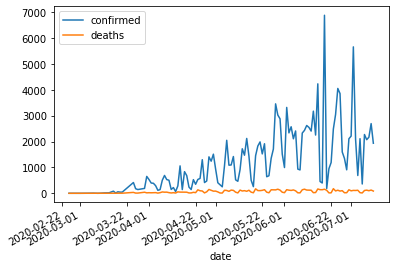

In [17]:
diario[["confirmed", "deaths"]].plot()

**4. Considere o gráfico do log de casos a partir somente do centésimo caso.**

/home/tobs/miniconda3/envs/mba/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


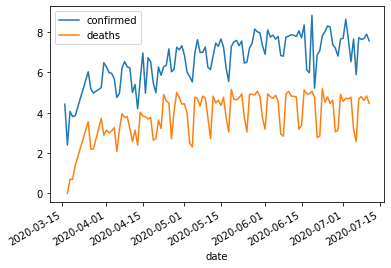

In [55]:
np.log(diario.query("total_confirmed >= 100")[["confirmed", "deaths"]]).plot()

## Exercício 2

1. Construa gráficos da média móvel simples e exponencialmente ponderada para casos. Utilize janela de 7 dias para a MMS e span=7 para MMEP.

2. Construa gráficos da média móvel simples e exponencialmente ponderada para mortes. Utilize janela de 7 dias para a MMS e span=7 para MMEP.


**Construa gráficos da média móvel simples e exponencialmente ponderada para a variável casos.**

In [57]:
mms_casos = diario['confirmed'].rolling(window=7).mean()
mmep_casos = diario.confirmed.ewm(span = 7, adjust = False).mean()

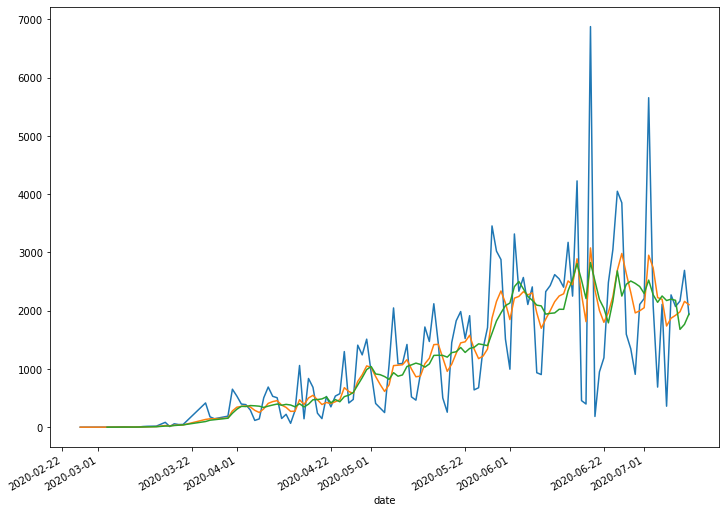

In [67]:
plt.figure(figsize=(12, 9))
diario.confirmed.plot()
mmep_casos.plot()
mms_casos.plot()


In [64]:
mms_mortes = diario.deaths.rolling(6).mean()
mmep_mortes = diario.deaths.ewm(span = 6, adjust=False).mean()

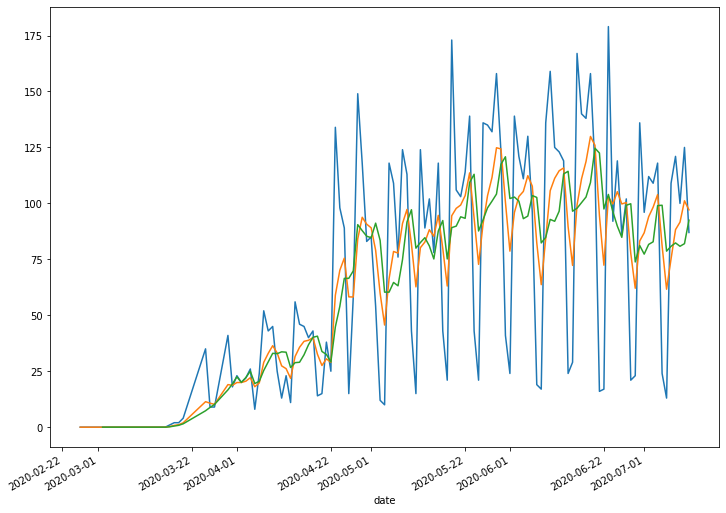

In [66]:
plt.figure(figsize=(12, 9))
diario.deaths.plot()

mmep_mortes.plot()
mms_mortes.plot()



**Construa gráficos da média móvel simples e exponencialmente ponderada para a variável mortes (deaths).**

## Exercício 3

Faça a decomposição em tendência e sazonalidade do número de casos utilizando a função seasonal_decompose do módulo statsmodels.

In [86]:
import statsmodels.api as sm

In [87]:
diario.index.dtype

dtype('<M8[ns]')

In [88]:
diario.index = diario.index.astype("datetime64[ns]")

In [89]:
len(diario)

129

In [90]:
diario = diario.asfreq("d") # nem todos os dias estão presentes na base, então vamos adicionar esses dias

In [91]:
len(diario)

138

In [92]:
diario.fillna(0, inplace=True) # linhas novas tem valor NaN por padrão

In [93]:
result = sm.tsa.seasonal_decompose(diario.confirmed, model='additive', period = 7)

<Figure size 720x432 with 0 Axes>

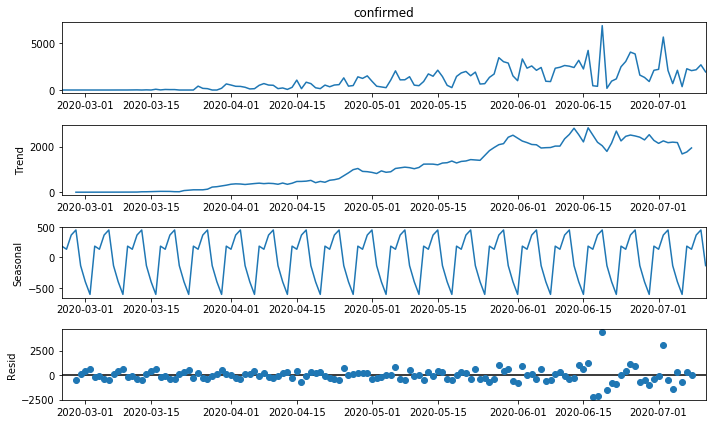

In [94]:
plt.figure(figsize=(10, 6))
plt.rcParams['figure.figsize'] = 10,6
result.plot()

plt.show()

In [54]:
filtered = diario.confirmed[diario.confirmed > 0]

In [55]:
result = sm.tsa.seasonal_decompose(filtered, model='multiplicative', period = 7)

<Figure size 720x432 with 0 Axes>

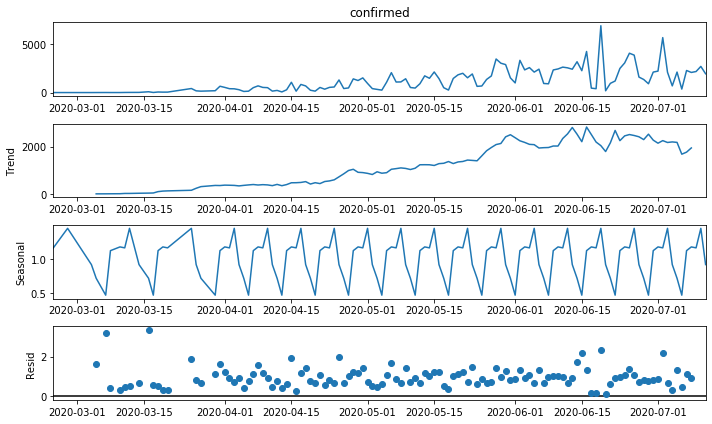

In [56]:
# plt.rcParams['figure.figsize'] = 10, 6
plt.figure(figsize=(10, 6))

result.plot()

plt.show()

**Na sua opinião, qual o tipo de sazonalidade mais adequada, aditiva ou multiplicativa? Justifique com base nos resíduos.**

In [51]:
pd.date_range('2000', freq='2D 1h', periods=3)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-03 01:00:00',
               '2000-01-05 02:00:00'],
              dtype='datetime64[ns]', freq='49H')